# Segunda lista de exercícios

Alunos:  Thalyssa de Almeida Monteiro e Pedro Henrique Silva de Almeida

In [ ]:
!pip install nltk
!pip install unidecode
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 4.3 MB/s eta 0:00:00


In [ ]:
import re
import pprint as pp
import pandas as pd
from google.colab import drive
import nltk
from nltk.tokenize import WhitespaceTokenizer, WordPunctTokenizer
from nltk.corpus import stopwords
from gensim.corpora.dictionary import Dictionary
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from string import punctuation
import unidecode
from collections import Counter
from nltk import pos_tag
from nltk.stem import RSLPStemmer
import tensorflow as tf
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
nltk.download('stopwords')
nltk.download('rslp')
stoplist = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


In [ ]:
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PLN/wiki_movie_plots_deduped.csv')

Mounted at /content/drive


##Pré-processamento

In [ ]:
data.head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...


In [ ]:
def preprocessing(data):

  df_text = data.copy()

  cols = ['statement_clean','statement_tokenized','origin/ethnicity']
  df = pd.DataFrame([],columns=cols)
  text_without_numbers = []

  Tokenizer = WordPunctTokenizer()

  for text in df_text:
    tokenized = Tokenizer.tokenize(str(text))
    word_list = []
    for word in tokenized:
      if word not in ['1234567890'] and word not in punctuation:
        word_list.append(unidecode.unidecode(word.lower()))

    text_without_numbers.append(' '.join([word for word in word_list]))

  df['statement_clean'] = text_without_numbers

  Tokenizer = WhitespaceTokenizer()

  df['statement_tokenized'] = df['statement_clean'].apply(lambda x: Tokenizer.tokenize(str(x)))
  tokenized_data = df['statement_tokenized']
  for tokens_list in tokenized_data:
    for token in tokens_list:
      if token in stoplist:
        tokens_list.remove(token)

  return df

def stemming(df):
    stemmer = nltk.stem.RSLPStemmer()
    df['statement_stem'] = df['statement_clean'].str.split().apply(lambda x:' '.join([stemmer.stem(y) for y in x]))

    return df

In [ ]:
preproc_data = preprocessing(data['Plot'])
preproc_data = stemming(preproc_data)

## Questão 1

Elabore um problema de classificação binária de textos coerente com
sua base.

a) Determine o rótulo dos documentos (separando os documentos em classes bem definidas).

b) Extraia as representações vetoriais com CountVectorizer e TF-IDF,
considerando os textos já processados como na primeira lista.


c) Treine um classificador baseado em cada uma das duas representações
vetoriais e Regressão Logística usando validação cruzada com 70% das
amostras selecionadas para treino e 30% para teste. Exiba as matrizes
de confusão, métricas de acurácia, precisão, recall e F1 score.

d) Faça o mesmo para o classificador Naive-Bayes.

e) Faça o mesmo para o classificador SVM com kernel linear.

f) Compare os 6 resultados.

### Resposta

#### Enunciado do problema

Apesar do cinema mais conhecido e popular do mundo ser o americano, existem inúmeros outros tipos de cinema cujos elementos se misturam e reinventam ao longo do tempo. Um problema de classificação binária possível é, com base no enredo, identificar se o mesmo é 'Western'(ocidental) ou 'Eastern'(Oriental)
Abaixo, segue a lista de todas as nacionalidades contidas no dataset e também segue uma classificaçao de escolas de cinema pela sua nacionalidade.


In [ ]:
preproc_data['origin/ethnicity'] = data['Origin/Ethnicity']
preproc_data.head()

,statement_clean,statement_tokenized,origin/ethnicity,statement_stem
0,a bartender is working at a saloon serving dri...,"[bartender, working, saloon, serving, drinks, ...",American,a bartend is working at a saloon serving drink...
1,the moon painted with a smiling face hangs ove...,"[moon, painted, smiling, face, hangs, park, ni...",American,the moon painted with a smiling fac hang ov a ...
2,the film just over a minute long is composed o...,"[film, over, minute, long, composed, two, shot...",American,the film just ov a minut long is composed of t...
3,lasting just 61 seconds and consisting of two ...,"[lasting, 61, seconds, consisting, two, shots,...",American,lasting just 61 second and consisting of two s...
4,the earliest known adaptation of the classic f...,"[earliest, known, adaptation, classic, fairyta...",American,the earliest known adaptation of the classic f...


In [ ]:
preproc_data['origin/ethnicity'].value_counts()

,count
origin/ethnicity,
American,17377
British,3670
Bollywood,2931
Tamil,2599
Telugu,1311
Japanese,1188
Malayalam,1095
Hong Kong,791
Canadian,723


#### Western:
- American
- British
- Canadian
- Australian
- Filipino
- Malaysian

#### Eastern:
- Bollywood
- Tamil
- Telugu
- Japanese
- Malayalam
- Hong Kong
- South Korean
- Chinese
- Kannada
- Bengali
- Marathi
- Bangladeshi
- Punjabi
- Turkish
- Egyptian
- Assamese
- Maldivian

#### a) Determine o rótulo dos documentos (separando os documentos em classes bem definidas).

In [ ]:
df = preproc_data.copy()

In [ ]:
WEST = ['American','British','Canadian','Australian','Filipino','Malaysian']
EAST = ['Chinese','Japanese','South_Korean','Hong Kong','Bollywood','Tamil','Telugu','Malayalam','Russian','Kannada','Turkish',
          'Egyptian','Marathi','Bengali','Bangladeshi','Punjabi','Assamese','Maldivian']

hemisphere = []
for item in df['origin/ethnicity']:
  test = item
  if test in WEST:
    hemisphere.append('West')
  else:
    hemisphere.append('East')

df['hemisphere'] = hemisphere

df['hemisphere'].value_counts()

,count
hemisphere,
West,22544
East,12342


As labels atribuídas ao nosso problema de classificação serão:

West = 1

East = 0


In [ ]:
df['hemisphere'] = df['hemisphere'].apply(lambda x: 1 if x == 'West' else 0)
df.head()

,statement_clean,statement_tokenized,origin/ethnicity,statement_stem,hemisphere
0,a bartender is working at a saloon serving dri...,"[bartender, working, saloon, serving, drinks, ...",American,a bartend is working at a saloon serving drink...,1
1,the moon painted with a smiling face hangs ove...,"[moon, painted, smiling, face, hangs, park, ni...",American,the moon painted with a smiling fac hang ov a ...,1
2,the film just over a minute long is composed o...,"[film, over, minute, long, composed, two, shot...",American,the film just ov a minut long is composed of t...,1
3,lasting just 61 seconds and consisting of two ...,"[lasting, 61, seconds, consisting, two, shots,...",American,lasting just 61 second and consisting of two s...,1
4,the earliest known adaptation of the classic f...,"[earliest, known, adaptation, classic, fairyta...",American,the earliest known adaptation of the classic f...,1


#### b) Extraia as representações vetoriais com CountVectorizer e TF-IDF, considerando os textos já processados como na primeira lista.

In [ ]:
cv = CountVectorizer(max_features=1000)
tfidf = TfidfVectorizer(max_features=1000)

cv_matrix = cv.fit_transform(df['statement_stem'])
tfidf_matrix = tfidf.fit_transform(df['statement_stem'])

print(cv_matrix.shape)
print(tfidf_matrix.shape)

(34886, 1000)
(34886, 1000)


#### c) Treine um classificador baseado em cada uma das duas representações vetoriais e Regressão Logística usando validação cruzada com 70% das amostras selecionadas para treino e 30% para teste. Exiba as matrizes de confusão, métricas de acurácia, precisão, recall e F1 score

Dadas as métricas da letra a, temos a seguinte tabela:

East | West
-----|-----
12342|22544

Que nos indica uma estratificação de $\approx$35% de filmes orientais e $\approx$65% de filmes ocidentais.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict

In [ ]:
def cm_display(model,X_test,y_test, title):

  metrics = "Accuracy | Precision | Recall | F=1"

  predictions = cross_val_predict(model, X_test, y_test, cv=3)

  cm = confusion_matrix(y_test, predictions, labels=model.classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
  ax.set_title(title)
  disp.plot(ax=ax)

  print(f'{metrics} :\n {classification_report(y_test, predictions)}\n')

  plt.show()

Accuracy | Precision | Recall | F=1 :
               precision    recall  f1-score   support

           0       0.81      0.79      0.80      3773
           1       0.88      0.90      0.89      6693

    accuracy                           0.86     10466
   macro avg       0.85      0.84      0.85     10466
weighted avg       0.86      0.86      0.86     10466




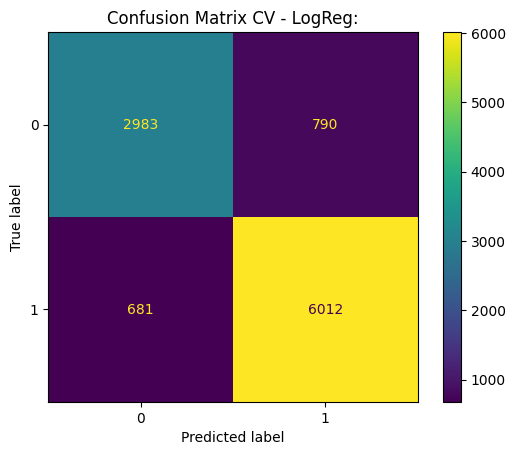

In [ ]:
# Confusion Matrix CV - LogReg

model = LogisticRegression(max_iter=1000)

X = cv_matrix
y = df['hemisphere']  # Classes correspondentes
fig, ax = plt.subplots()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model.fit(X_train,y_train)

cm_display(model, X_test, y_test, 'Confusion Matrix for CV - LogReg:')

Accuracy | Precision | Recall | F=1 :
               precision    recall  f1-score   support

           0       0.90      0.75      0.82      3773
           1       0.87      0.95      0.91      6693

    accuracy                           0.88     10466
   macro avg       0.88      0.85      0.86     10466
weighted avg       0.88      0.88      0.88     10466




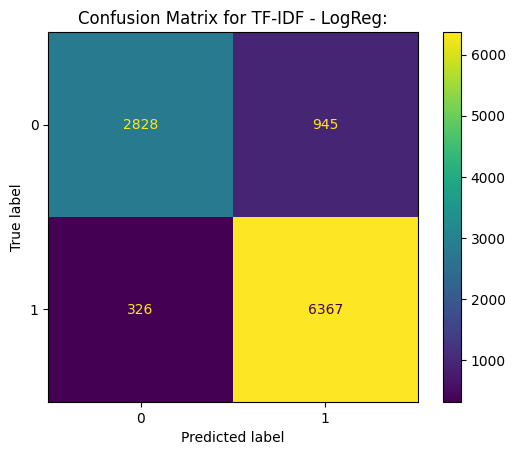

In [ ]:
# Confusion Matrix for TF-IDF - LogReg

model = LogisticRegression(max_iter=1000)

X = tfidf_matrix
y = df['hemisphere']
fig, ax = plt.subplots()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model.fit(X_train,y_train)

cm_display(model, X_test, y_test, 'Confusion Matrix for TF-IDF - LogReg:')

#### d) Faça o mesmo para o classificador Naive-Bayes.

Accuracy | Precision | Recall | F=1 :
               precision    recall  f1-score   support

           0       0.59      0.89      0.71      3773
           1       0.91      0.65      0.76      6693

    accuracy                           0.73     10466
   macro avg       0.75      0.77      0.73     10466
weighted avg       0.79      0.73      0.74     10466




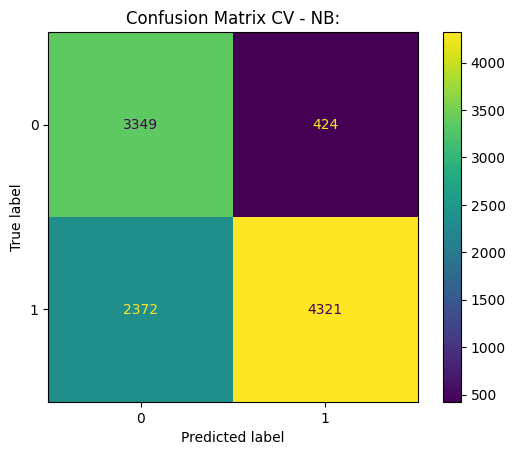

In [ ]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

X = cv_matrix
y = df['hemisphere']  # Classes correspondentes
fig, ax = plt.subplots()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model.fit(X_train.toarray(),y_train)

cm_display(model, X_test.toarray(), y_test, 'Confusion Matrix for CV - NB:')

Accuracy | Precision | Recall | F=1 :
               precision    recall  f1-score   support

           0       0.75      0.83      0.79      3773
           1       0.90      0.85      0.87      6693

    accuracy                           0.84     10466
   macro avg       0.83      0.84      0.83     10466
weighted avg       0.85      0.84      0.84     10466




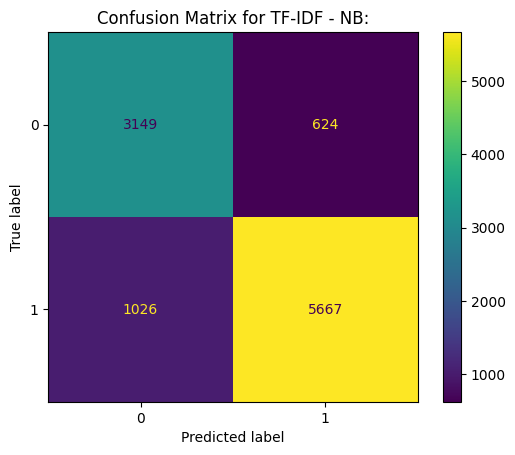

In [ ]:
model = GaussianNB()

X = tfidf_matrix
y = df['hemisphere']  # Classes correspondentes
fig, ax = plt.subplots()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model.fit(X_train.toarray(),y_train)

cm_display(model, X_test.toarray(), y_test, 'Confusion Matrix for TF-IDF - NB:')

#### e) Faça o mesmo para o classificador SVM com kernel linear.

Accuracy | Precision | Recall | F=1 :
               precision    recall  f1-score   support

           0       0.80      0.79      0.79      3773
           1       0.88      0.89      0.88      6693

    accuracy                           0.85     10466
   macro avg       0.84      0.84      0.84     10466
weighted avg       0.85      0.85      0.85     10466




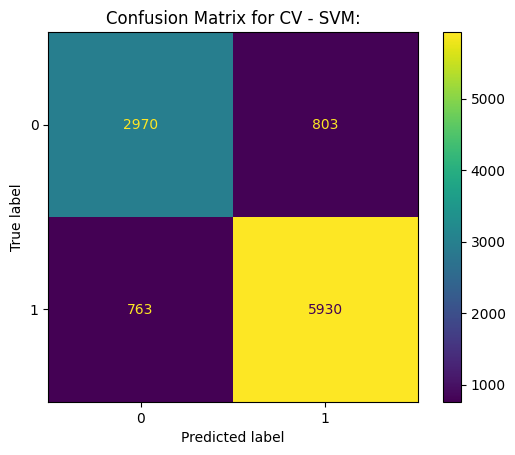

In [ ]:
from sklearn import svm

model = svm.SVC(kernel='linear')

X = cv_matrix
y = df['hemisphere']  # Classes correspondentes
fig, ax = plt.subplots()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model.fit(X_train.toarray(),y_train)

cm_display(model, X_test.toarray(), y_test, 'Confusion Matrix for CV - SVM:')

Accuracy | Precision | Recall | F=1 :
               precision    recall  f1-score   support

           0       0.88      0.78      0.82      3773
           1       0.88      0.94      0.91      6693

    accuracy                           0.88     10466
   macro avg       0.88      0.86      0.87     10466
weighted avg       0.88      0.88      0.88     10466




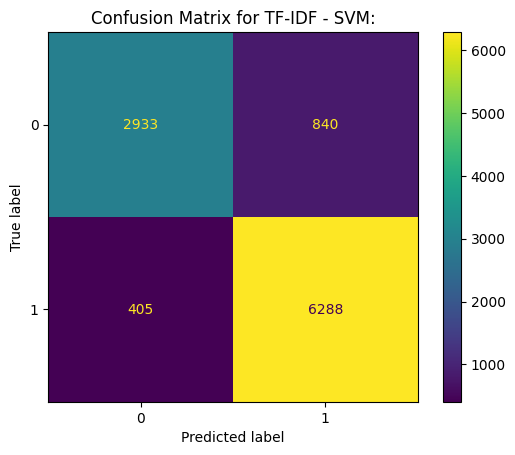

In [ ]:
model = svm.SVC(kernel='linear')

X = tfidf_matrix
y = df['hemisphere']  # Classes correspondentes
fig, ax = plt.subplots()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model.fit(X_train.toarray(),y_train)

cm_display(model, X_test.toarray(), y_test, 'Confusion Matrix for TF-IDF - SVM:')

#### f) Compare os 6 resultados.

Melhor modelo geral:
SVM com TF-IDF e Logistic Regression com TF-IDF. Ambos têm a mesma acurácia (0.88) e F1-score (0.91) para a Classe 1.

Escolher entre eles depende do objetivo:
Logistic Regression é ligeiramente melhor em identificar exemplos da Classe 1 (maior recall).
SVM apresenta um desempenho mais equilibrado entre as classes.
Modelo mais rápido para treino e predição:
Logistic Regression com TF-IDF, pois o SVM é computacionalmente mais caro devido à complexidade do kernel.

Pior modelo:
Naive Bayes com CountVectorizer. Seu desempenho inferior em todas as métricas o torna inviável para este problema.

Uso em cenários específicos:

Se o foco é minimizar falsos negativos na Classe 1 (identificar positivos): Logistic Regression com TF-IDF.
Se é necessário um equilíbrio entre classes: SVM com TF-IDF.
Para eficiência computacional com boa performance: Logistic Regression com CountVectorizer.

## Questão 2

Realize um comparativo entre os métodos LDA, SVD e NMF para
realizar modelagem de tópicos. Para cada método:

a) empiricamente, tente identificar uma quantidade de tópicos adequada
para seu problema. Exiba resultados que justifiquem a quantidade de
tópicos escolhida;

b) identifique as 5 palavras mais relevantes de cada tópico;

c) identifique os 3 tópicos mais relevantes de 5 documentos quaisquer (você
pode representar os tópicos por suas 5 palavras mais relevantes).

d) qual método apresentou melhores resultados, na sua opinião? Justifique com resultados/dados.

### Resposta


### LDA

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics.pairwise import cosine_similarity

tfidf_matrix = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), max_features=1000)

df_topics = df['statement_clean'].copy()

tfidf_doc_matrix = tfidf_matrix.fit_transform(df_topics)

tfidf_doc_matrix_df = pd.DataFrame(tfidf_doc_matrix.toarray(), columns=tfidf_matrix.get_feature_names_out())

In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
from gensim.corpora.dictionary import Dictionary

topics_list = list()

df_topics['statement_tokenized'] = df_topics.apply(lambda x: word_tokenize(x.lower()))

vocab = Dictionary(df_topics['statement_tokenized'].tolist())

corpus = [vocab.doc2bow(text) for text in df_topics['statement_tokenized']]

feature_names = [vocab[i] for i in range(len(vocab))]

n_top_words = 9

In [ ]:
from gensim.models.coherencemodel import CoherenceModel
lda_coherence = list()

for k in range(3, 16):
  print(f'Running LDA with N# of topics: {k}')
  lda = LatentDirichletAllocation(n_components=k, random_state=0, n_jobs=-1)

  topics_lda = lda.fit_transform(tfidf_doc_matrix)

  topics = lda.components_

  topics_list.append(topics)

  top_words = []
  for topic in topics:
      top_words.append([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])

  lda_coherence.append(CoherenceModel(topics=top_words, texts=df_topics['statement_tokenized'], dictionary=vocab, coherence='c_v').get_coherence())

Running LDA with N# of topics: 3
Running LDA with N# of topics: 4
Running LDA with N# of topics: 5
Running LDA with N# of topics: 6
Running LDA with N# of topics: 7
Running LDA with N# of topics: 8
Running LDA with N# of topics: 9
Running LDA with N# of topics: 10
Running LDA with N# of topics: 11
Running LDA with N# of topics: 12
Running LDA with N# of topics: 13
Running LDA with N# of topics: 14
Running LDA with N# of topics: 15


#### b)

In [ ]:
topic_words = {}

vocab = tfidf_matrix.get_feature_names_out()

for topic, comp in enumerate(lda.components_):
    word_idx = np.argsort(comp)[::-1][:5]

    topic_words[topic] = [vocab[i] for i in word_idx]

for topic, words in topic_words.items():
    print(f'Topic: {topic + 1}')
    print(f'  {", ".join([word for word in words])}')

Topic: 1
  peter, ghost, house, mother, mr
Topic: 2
  school, charlie, ben, chris, high school
Topic: 3
  michael, frank, car, billy, house
Topic: 4
  war, army, japanese, soldiers, british
Topic: 5
  king, prince, princess, village, queen
Topic: 6
  york, new york, new, mary, henry
Topic: 7
  police, vijay, love, raj, krishna
Topic: 8
  harry, jim, paul, steve, eddie
Topic: 9
  johnny, gang, bank, town, money
Topic: 10
  team, sam, george, game, jane
Topic: 11
  love, father, family, mother, marriage
Topic: 12
  david, matt, alan, eric, american
Topic: 13
  tom, ship, jerry, crew, joe
Topic: 14
  film, story, life, young, love
Topic: 15
  police, murder, jack, detective, case


#### C)

In [ ]:
tfidfdocs = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), max_features=1000)

tfidf_doc_rel = tfidfdocs.fit_transform(df_topics[16:21])

lda_topics_rel = LatentDirichletAllocation(n_components=3, random_state=0, n_jobs=-1)

topics_lda_rel = lda_topics_rel.fit_transform(tfidf_doc_rel)

topic_words = {}

vocab = tfidfdocs.get_feature_names_out()

for topic, comp in enumerate(lda_topics_rel.components_):
    word_idx = np.argsort(comp)[::-1][:5]

    topic_words[topic] = [vocab[i] for i in word_idx]

for topic, words in topic_words.items():
    print(f'Topic: {topic + 1}')
    print(f'  {", ".join([word for word in words])}')

Topic: 1
  comes, known, world, gets, moment
Topic: 2
  scrooge, dollie, plans, moment, gypsy
Topic: 3
  girl, thug, rescuer, lawrence, florence


## SVD

In [ ]:
from sklearn.decomposition import TruncatedSVD

svd_coherence = list()
svd_topics_list = list()
vocab = Dictionary(df_topics['statement_tokenized'].tolist())

for k in range(3, 16):
  print(f'Running SVD/LSA with N# of topics: {k}')
  svd = TruncatedSVD(n_components=k, random_state=0)

  topics_svd = svd.fit_transform(tfidf_doc_matrix)

  topics = svd.components_

  svd_topics_list.append(topics)

  top_words = []
  for topic in topics:
      top_words.append([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])

  svd_coherence.append(CoherenceModel(topics=top_words, texts=df_topics['statement_tokenized'], dictionary=vocab, coherence='c_v').get_coherence())

Running SVD/LSA with N# of topics: 3
Running SVD/LSA with N# of topics: 4
Running SVD/LSA with N# of topics: 5
Running SVD/LSA with N# of topics: 6
Running SVD/LSA with N# of topics: 7
Running SVD/LSA with N# of topics: 8
Running SVD/LSA with N# of topics: 9
Running SVD/LSA with N# of topics: 10
Running SVD/LSA with N# of topics: 11
Running SVD/LSA with N# of topics: 12
Running SVD/LSA with N# of topics: 13
Running SVD/LSA with N# of topics: 14
Running SVD/LSA with N# of topics: 15


#### b)

In [ ]:
topic_words = {}

vocab = tfidf_matrix.get_feature_names_out()

for topic, comp in enumerate(svd.components_):
    word_idx = np.argsort(comp)[::-1][:5]

    topic_words[topic] = [vocab[i] for i in word_idx]

for topic, words in topic_words.items():
    print(f'Topic: {topic + 1}')
    print(f'  {", ".join([word for word in words])}')

Topic: 1
  father, love, family, man, life
Topic: 2
  love, father, family, village, marriage
Topic: 3
  film, story, war, life, world
Topic: 4
  tom, jerry, school, new, film
Topic: 5
  tom, jerry, love, village, king
Topic: 6
  film, police, story, tom, gang
Topic: 7
  love, joe, falls love, falls, king
Topic: 8
  school, students, village, friends, high school
Topic: 9
  joe, family, village, war, town
Topic: 10
  jack, mary, village, school, father
Topic: 11
  village, villagers, man, young, woman
Topic: 12
  joe, king, man, young, father
Topic: 13
  john, young, school, father, war
Topic: 14
  king, town, gang, money, john
Topic: 15
  john, raja, dr, film, village


#### c)

In [ ]:
svd_topics_rel = TruncatedSVD(n_components=3, random_state=0)

topics_svd_rel = svd_topics_rel.fit_transform(tfidf_doc_rel)

topic_words = {}

vocab = tfidfdocs.get_feature_names_out()

for topic, comp in enumerate(svd_topics_rel.components_):
    word_idx = np.argsort(comp)[::-1][:5]

    topic_words[topic] = [vocab[i] for i in word_idx]

for topic, words in topic_words.items():
    print(f'Topic: {topic + 1}')
    print(f'  {", ".join([word for word in words])}')

Topic: 1
  girl, thug, rescuer, biograph, company
Topic: 2
  dollie, moment, plans, barrel, gypsy
Topic: 3
  scrooge, ways, christmas, ways scrooge, scene


## NMF

In [ ]:
from sklearn.decomposition import NMF

nmf_coherence = list()
nmf_topics_list = list()
vocab = Dictionary(df_topics['statement_tokenized'].tolist())

for k in range(3, 16):
  print(f'Running NMF with N# of topics: {k}')
  nmf = NMF(n_components=k, random_state=0, max_iter=700)

  topics_nmf = nmf.fit_transform(tfidf_doc_matrix)

  topics = nmf.components_

  nmf_topics_list.append(topics)

  top_words = []
  for topic in topics:
      top_words.append([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])

  nmf_coherence.append(CoherenceModel(topics=top_words, texts=df_topics['statement_tokenized'], dictionary=vocab, coherence='c_v').get_coherence())

Running NMF with N# of topics: 3
Running NMF with N# of topics: 4
Running NMF with N# of topics: 5
Running NMF with N# of topics: 6
Running NMF with N# of topics: 7
Running NMF with N# of topics: 8
Running NMF with N# of topics: 9
Running NMF with N# of topics: 10
Running NMF with N# of topics: 11
Running NMF with N# of topics: 12
Running NMF with N# of topics: 13
Running NMF with N# of topics: 14
Running NMF with N# of topics: 15


#### b)

In [ ]:
topic_words = {}

vocab = tfidf_matrix.get_feature_names_out()

for topic, comp in enumerate(nmf.components_):
    word_idx = np.argsort(comp)[::-1][:5]

    topic_words[topic] = [vocab[i] for i in word_idx]

for topic, words in topic_words.items():
    print(f'Topic: {topic + 1}')
    print(f'  {", ".join([word for word in words])}')

Topic: 1
  house, tells, home, night, day
Topic: 2
  father, family, son, mother, daughter
Topic: 3
  film, story, life, movie, set
Topic: 4
  new, york, new york, mary, harry
Topic: 5
  tom, jerry, cat, george, dog
Topic: 6
  police, gang, murder, officer, killed
Topic: 7
  love, falls love, falls, marriage, marry
Topic: 8
  school, students, high school, high, team
Topic: 9
  joe, town, frank, larry, billy
Topic: 10
  jack, ben, billy, game, peter
Topic: 11
  village, villagers, people, city, temple
Topic: 12
  man, young, woman, husband, wife
Topic: 13
  war, ship, army, captain, men
Topic: 14
  king, prince, queen, princess, castle
Topic: 15
  john, dr, elizabeth, town, henry


#### c)

In [ ]:
nmf_topics_rel = NMF(n_components=3, random_state=0)

topics_nmf_rel = nmf_topics_rel.fit_transform(tfidf_doc_rel)

topic_words = {}

vocab = tfidfdocs.get_feature_names_out()

for topic, comp in enumerate(nmf_topics_rel.components_):
    word_idx = np.argsort(comp)[::-1][:5]

    topic_words[topic] = [vocab[i] for i in word_idx]

for topic, words in topic_words.items():
    print(f'Topic: {topic + 1}')
    print(f'  {", ".join([word for word in words])}')

Topic: 1
  girl, thug, rescuer, lawrence, florence
Topic: 2
  dollie, plans, moment, barrel, gypsy
Topic: 3
  scrooge, christmas, ways, ways scrooge, film


## d)

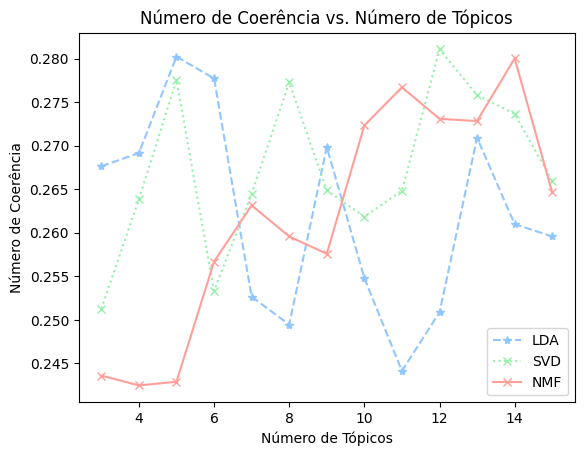

In [ ]:
plt.style.use('seaborn-v0_8-pastel')

fig, ax = plt.subplots()

ax.plot(range(3, 16), lda_coherence, label='LDA', linestyle='dashed', marker='*')
ax.plot(range(3, 16), svd_coherence, label='SVD', linestyle='dotted', marker='x')
ax.plot(range(3, 16), nmf_coherence, label='NMF', marker='x')

ax.set_xlabel('Número de Tópicos')
ax.set_ylabel('Número de Coerência')
ax.set_title('Número de Coerência vs. Número de Tópicos')
ax.legend()

plt.show()

Com base na análise do gráfico, o método LDA apresentou os melhores resultados pois teve o maior score de Coerência em praticamente toda a faixa de Número de Tópicos analisada até n=6.

Os métodos SVD e NMF tenham apresentado melhoras no score de Coerência à medida que o Número de Tópicos aumentava, se mostrando melhores com um número de tópicos mais alto.

De modo geral, o método svd apresentou um melhor desempenho devido ao fato que mesmo com quedas bruscas no coeficiente de coerência, nenhum resultado obteve score menor do que o score com o número mínimo de tópicos.

## Questão 3

Realize um agrupamento dos dados usando a representação do Count-
Vectorizer, seguindo os seguintes passos:

a) Aplique o algoritmo PCA, preservando 95% da variância nos dados.
Qual a dimensão resultante dos dados projetados?

b) Aplique um algoritmo k-means nos dados projetados, tentando usar o
método elbow para encontrar o valor de k ótimo.

### Resposta

### a)

In [ ]:
from sklearn.decomposition import PCA

df_topics = df['statement_clean'].copy()

pca = PCA(n_components=0.95)

bag_of_words = CountVectorizer(stop_words='english', ngram_range=(1,2), max_features=1000)

bag_of_words_matrix = bag_of_words.fit_transform(df_topics)

pca_matrix = pca.fit_transform(bag_of_words_matrix.toarray())

pca_matrix.shape

(34886, 719)

## b)

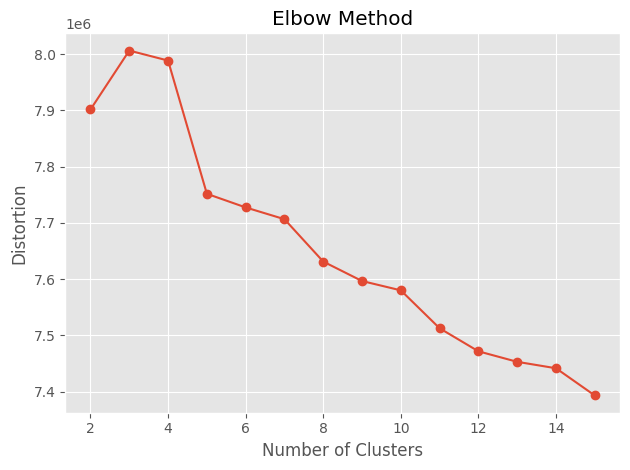

In [ ]:
from sklearn.cluster import KMeans

distortion_list = []

for k in range(2, 16):
  kmeans = KMeans(n_clusters=k, random_state=0, n_init='auto')

  kmeans.fit(pca_matrix)

  distortion_list.append(kmeans.inertia_)

fig, ax = plt.subplots()

ax.plot(range(2, 16), distortion_list, marker='o')

ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Distortion')
ax.set_title('Elbow Method')

plt.tight_layout()
plt.show()

Analisando o gráfico acima, é possível perceber uma diminuição significativa das distorções a partir de 4 clusters. Considerando as quedas seguintes e o fato de que não aconteceu nenhuma delas a partir de 12 clusters, acreditamos que o número ideal esteja entre 12 e 14 clusters.

## Questão 4

Nesta quest ̃ao você deve aplicar métodos de projeção multidimensional
para visualizar os dados no espaço visual, usando os resultados da segunda
e terceira questões.

a) aplique os métodos de projeção multidimensional t-SNE e UMAP na
representação CountVectorizer e plote os gráfico das projeções resultan-
tes, colorindo os pontos de acordo com os grupos obtidos pelo k-means

b) Experimente variar os hiperparâmetros perplexity do t-SNE e n neighbors
do UMAP no experimento da questão 4a. O que acontece com as projeções quando estes parâmetros são calibrados para valores menores ou maiores do que seus valores padrão?

c) aplique os métodos de projeção multidimensional t-SNE e UMAP nos
vetores resultantes de sua melhor modelagem de tópicos (questão 2d),
encontre bons valores para os hiperparâmetros perplexity do t-SNE
e n neighbors do UMAP, e plote os gráfico das melhores projeções
obtidas por cada método de projeção.

### Resposta

In [ ]:
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.0 MB/s eta 0:00:00


In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0, n_jobs=-1)

tsne_matrix = tsne.fit_transform(bag_of_words_matrix.toarray())

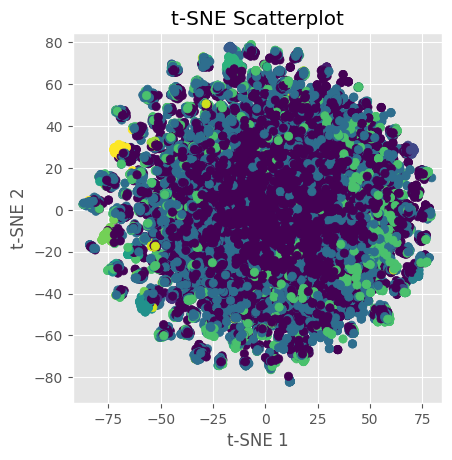

In [ ]:
fig, ax = plt.subplots()

labels = kmeans.predict(pca_matrix)

df_tsne = pd.DataFrame({'tsne_1': tsne_matrix[:, 0], 'tsne_2': tsne_matrix[:, 1], 'labels': labels})

ax.scatter(data=df_tsne, x='tsne_1', y='tsne_2', c=labels)

limit = (tsne_matrix.min() - 5, tsne_matrix.max() + 5)

ax.set_xlim(limit)
ax.set_ylim(limit)

ax.set_xlabel('t-SNE 1')
ax.set_ylabel('t-SNE 2')
ax.set_aspect('equal')
ax.set_title('t-SNE Scatterplot')

plt.show()

In [ ]:
import umap

reducer = umap.UMAP()

embedding = reducer.fit_transform(bag_of_words_matrix.toarray())

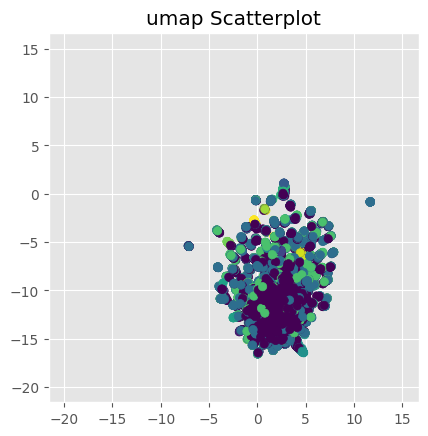

In [ ]:
fig, ax = plt.subplots()

df_umap = pd.DataFrame({'umap_1': embedding[:, 0], 'umap_2': embedding[:, 1], 'labels': labels})

ax.scatter(data=df_umap, x='umap_1', y='umap_2', c=labels)

limit = (embedding.min() - 5, embedding.max() + 5)

ax.set_xlim(limit)
ax.set_ylim(limit)

ax.set_aspect('equal')
ax.set_title('umap Scatterplot')

plt.show()

## b)

In [ ]:
tsne = TSNE(n_components=2, random_state=0, n_jobs=-1, perplexity=500)

tsne_matrix = tsne.fit_transform(bag_of_words_matrix.toarray())

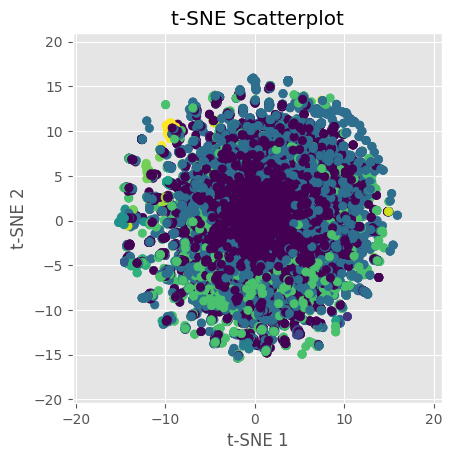

In [ ]:
fig, ax = plt.subplots()

labels = kmeans.predict(pca_matrix)

df_tsne = pd.DataFrame({'tsne_1': tsne_matrix[:, 0], 'tsne_2': tsne_matrix[:, 1], 'labels': labels})

ax.scatter(data=df_tsne, x='tsne_1', y='tsne_2', c=labels)

limit = (tsne_matrix.min() - 5, tsne_matrix.max() + 5)

ax.set_xlim(limit)
ax.set_ylim(limit)

ax.set_xlabel('t-SNE 1')
ax.set_ylabel('t-SNE 2')
ax.set_aspect('equal')
ax.set_title('t-SNE Scatterplot')

plt.show()

In [ ]:
import umap

reducer = umap.UMAP(n_neighbors=14)

embedding = reducer.fit_transform(bag_of_words_matrix.toarray())

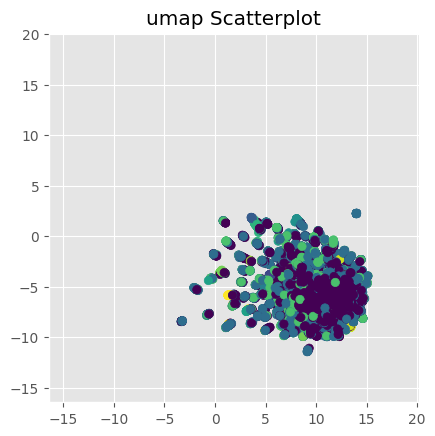

In [ ]:
fig, ax = plt.subplots()

df_umap = pd.DataFrame({'umap_1': embedding[:, 0], 'umap_2': embedding[:, 1], 'labels': labels})

ax.scatter(data=df_umap, x='umap_1', y='umap_2', c=labels)

limit = (embedding.min() - 5, embedding.max() + 5)

ax.set_xlim(limit)
ax.set_ylim(limit)

ax.set_aspect('equal')
ax.set_title('umap Scatterplot')

plt.show()

Alterando o valor de perplexity no algoritmo t-SNE é possível perceber que os clusters ficam ainda mais compactos no espaço, sobrepondo-se uns pelos outros e resultando numa escala menor. Já os valores de n_neighbors acabam "direcionando" os dados para outro eixo na plotagem.

## c)

In [ ]:
tsne = TSNE(n_components=2, random_state=0, n_jobs=-1, perplexity=300)

tsne_matrix = tsne.fit_transform(topics_nmf)

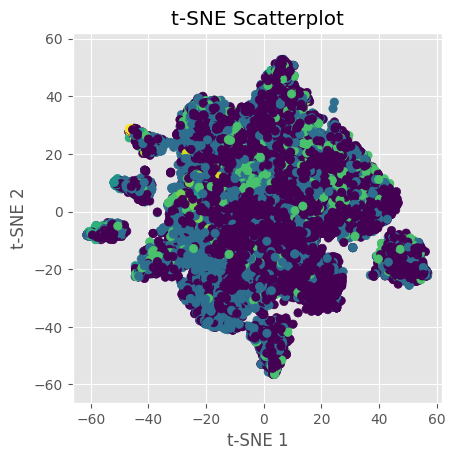

In [ ]:
fig, ax = plt.subplots()

labels = kmeans.predict(pca_matrix)

df_tsne = pd.DataFrame({'tsne_1': tsne_matrix[:, 0], 'tsne_2': tsne_matrix[:, 1], 'labels': labels})

ax.scatter(data=df_tsne, x='tsne_1', y='tsne_2', c=labels)

limit = (tsne_matrix.min() - 5, tsne_matrix.max() + 5)

ax.set_xlim(limit)
ax.set_ylim(limit)

ax.set_xlabel('t-SNE 1')
ax.set_ylabel('t-SNE 2')
ax.set_aspect('equal')
ax.set_title('t-SNE Scatterplot')

plt.show()

In [ ]:
reducer = umap.UMAP(n_neighbors=56)

embedding = reducer.fit_transform(bag_of_words_matrix.toarray())

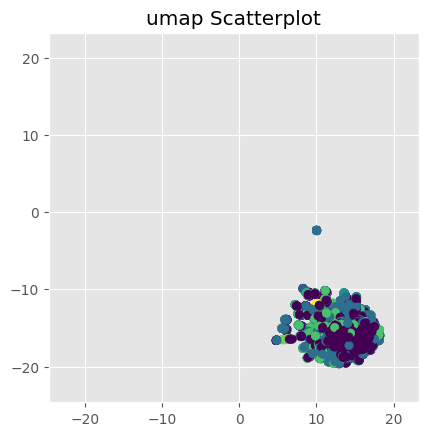

In [ ]:
fig, ax = plt.subplots()

df_umap = pd.DataFrame({'umap_1': embedding[:, 0], 'umap_2': embedding[:, 1], 'labels': labels})

ax.scatter(data=df_umap, x='umap_1', y='umap_2', c=labels)

limit = (embedding.min() - 5, embedding.max() + 5)

ax.set_xlim(limit)
ax.set_ylim(limit)

ax.set_aspect('equal')
ax.set_title('umap Scatterplot')

plt.show()